In [57]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import pandas as pd

In [55]:
def plotTSP(paths, points, num_iters=1):
    plt.figure(figsize=(8, 8))
    x = []; y = []
    df = pd.DataFrame(points)
                      
    for name, group in df.groupby(2):
        plt.plot(group[0], group[1], name, linestyle='', markersize=10)
        
    for i in paths[0]:
        x.append(points[i][0])
        y.append(points[i][1])
        
    a_scale = float(max(x))/float(100)

    if num_iters > 1:

        for i in range(1, num_iters):
            xi = []; yi = [];
            for j in paths[i]:
                xi.append(points[j][0])
                yi.append(points[j][1])

            plt.arrow(xi[-1], yi[-1], (xi[0] - xi[-1]), (yi[0] - yi[-1]), 
                    head_width = a_scale, color = 'r', 
                    length_includes_head = True, ls = 'dashed',
                    width = 0.001/float(num_iters))
            for i in range(0, len(x) - 1):
                plt.arrow(xi[i], yi[i], (xi[i+1] - xi[i]), (yi[i+1] - yi[i]),
                        head_width = a_scale, color = 'r', length_includes_head = True,
                        ls = 'dashed', width = 0.001/float(num_iters))

    plt.arrow(x[-1], y[-1], (x[0] - x[-1]), (y[0] - y[-1]), head_width = a_scale, 
            color ='g', length_includes_head=True)
    for i in range(0,len(x)-1):
        plt.arrow(x[i], y[i], (x[i+1] - x[i]), (y[i+1] - y[i]), head_width = a_scale,
                color = 'g', length_includes_head = True)

    plt.xlim(0, max(x)*1.1)
    plt.ylim(0, max(y)*1.1)
    plt.show()
    

In [111]:

def animateTSP(history, points):
    key_frames_mult = len(history)#/ 1500

    fig, ax = plt.subplots()

    line, = plt.plot([], [], lw=2)

    def init():
        x = [points[i][0] for i in history[0]]
        y = [points[i][1] for i in history[0]]
        plt.plot(x, y, 'co')

        ax.set_xlim(0, max(x) * 1.1)
        ax.set_ylim(0, max(y) * 1.1)

        line.set_data([], [])
        return line,

    def update(frame):
        x = [points[i, 0] for i in history[frame] + [history[frame][0]]]
        y = [points[i, 1] for i in history[frame] + [history[frame][0]]]
        line.set_data(x, y)
        return line                         

    ani = FuncAnimation(fig, update, frames=range(0, len(history), key_frames_mult),
        init_func=init, interval=200, repeat=False)

    plt.show()

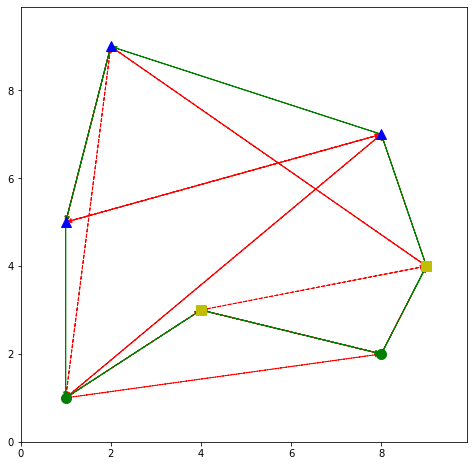

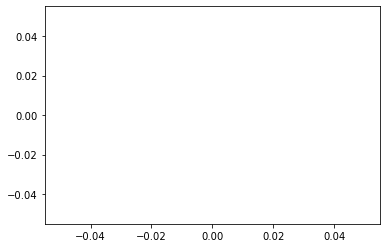

In [112]:


if __name__ == '__main__':
    x_cor = [1, 8, 4, 9, 2, 1, 8]
    y_cor = [1, 2, 3, 4, 9, 5, 7]
    col = ['go', 'go', 'ys', 'ys', 'b^', 'b^', 'b^']
    
    points = []
    for i in range(0, len(x_cor)):
        points.append((x_cor[i], y_cor[i], col[i]))

    path4 = [0, 1, 2, 3, 4, 5, 6]
    path3 = [0, 2, 1, 3, 4, 5, 6]
    path2 = [0, 2, 1, 3, 6, 5, 4]
    path1 = [0, 2, 1, 3, 6, 4, 5]

    paths = [path1, path2, path3, path4]
    
    plotTSP(paths, points, 4)
    animateTSP(paths, points)